# Horodecki state

In [1]:
import numpy as np, matplotlib.pyplot as plt
off = 1
def delta(i,j):
	if i==j:
		return 1
	return 0
	
def pz(i,j,a):
    j = (j+off)%3
    return (2/7/3)*delta(i,j) + (a/3/7) * (delta(i,0)*delta(j,1) + delta(i,1)*delta(j,2) + delta(i,2)*delta(j,0)) + ((5-a)/3/7) * (delta(i,1)*delta(j,0) + delta(i,2)*delta(j,1) + delta(i,0)*delta(j,2))
	
def pzi(i,a):
	return sum([pz(i,j,a) for j in range(3)])
	
def pzj(j,a):
	return sum([pz(i,j,a) for i in range(3)])
		
def Pz(a):
	res = sum([pz(i,i,a) for i in range(3)])
	return res
		
def Iz(a):
	res = sum([pz(i,j,a) * np.log2(pz(i,j,a) / pzi(i,a) / pzj(j,a)) if pz(i,j,a)!=0 else 0 for j in range(3) for i in range(3)])
	
	res = res.flatten()
	res = sum(res)
	
	return res

def pccz(a):
    x = [np.exp(1j * 2*np.pi / d * i) for i in range(3)]
    x = [-1, 0, 1]
    zz = sum([pz(i,j,a) * x[i] * x[j] for j in range(3) for i in range(3)])
    zi = sum([pzi(i,a) * x[i] for i in range(3)])
    zj = sum([pzj(j,a) * x[j] for j in range(3)])
    zzi = sum([pzi(i,a) * x[i]**2 for i in range(3)])
    zzj = sum([pzj(j,a) * x[j]**2 for j in range(3)])

    res = zz - zi*zj
    res = res / np.sqrt(zzi - zi**2)
    res = res / np.sqrt(zzj - zj**2)

    return res
	
def neg(a):
	n = (1/28) * (2*np.sqrt(41 - 20*a + 4*a**2) - 10)
	return max([0,n])

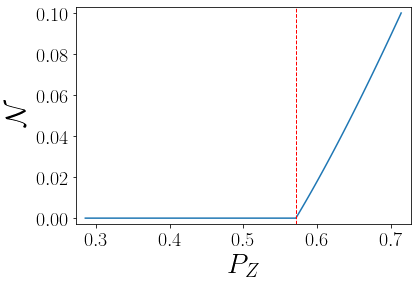

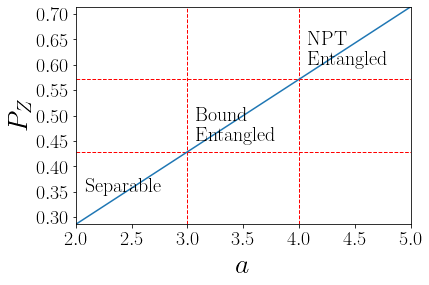

In [30]:
d = 2 
cor = Pz
xlab = '$P_Z$'
colors  = ['red', 'blue', 'green', 'yellow', 'orange', 'maroon', 'magenta', 'darkgreen', 'black', 'brown', 'purple']
i_col = 0
c_list = []
n_list = []
for a in np.linspace(2,5,100):
    # c_list.append(1*Px(a,d)+1*Pz(a,d))
    # c_list.append(1*Ix(a,d)+1*Iz(a,d))
    c_list.append(1*cor(a))
    n_list.append(neg(a))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Helvetica"]})


plt.plot(c_list, n_list)
# plt.plot(c_list, np.arange(0,1.01,0.1))	
#plt.ylim([0,1])
plt.xlabel(xlab, size=28)
plt.ylabel('$\mathcal{N}$', size=28)
plt.xticks(size=20)
plt.yticks(size=20)
# plt.axvline(x=cor(2), ls='dashed')
plt.axvline(x=cor(4), ls='dashed', color='red', lw=1)
# plt.legend(bbox_to_anchor=(1,1))
plt.margins(0.03,0.03)
plt.savefig('n_vs_pz_horodecki.pdf', bbox_inches='tight')
plt.show()

a = np.linspace(2,5,100)
ya = [cor(a[i]) for i in range(len(a))]
plt.axvline(x=3, ls='dashed', color='red', lw=1)
plt.axvline(x=4, ls='dashed', color='red', lw=1)
plt.axhline(cor(3), ls='dashed', color='red', lw=1)
plt.axhline(cor(4), ls='dashed', color='red', lw=1)
plt.xlabel('$a$', size=28)
plt.ylabel(xlab, size=28)
plt.xticks(size=20)
plt.yticks(size=20)
plt.margins(0)
plt.text(s='Separable', x=2.08, y=0.35, size=20)
plt.text(s='Bound\nEntangled', x=3.08, y=0.45, size=20)
plt.text(s='NPT\nEntangled', x=4.08, y=0.6, size=20)
plt.plot(a, ya)
plt.savefig('pz_vs_a_horodecki.pdf', bbox_inches='tight')

# Werner state

In [1]:
import numpy as np, matplotlib.pyplot as plt

def delta(i,j):
	if i==j:
		return 1
	return 0
	
def pz(i,j,a,d):
    return a * (1 + delta(i,j)) / (d*(d+1)) + (1-a) * (1 - delta(i,j)) / (d*(d-1))

	
def px(i,j,a,d):
	return pz(i,j,a,d)
	
def pzi(i,a,d):
	return sum([pz(i,j,a,d) for j in range(d)])
	
def pzj(j,a,d):
	return sum([pz(i,j,a,d) for i in range(d)])
	
def pxi(i,a,d):
	return sum([px(i,j,a,d) for j in range(d)])
	
def pxj(j,a,d):
	return sum([px(i,j,a,d) for i in range(d)])
	
def Px(a,d):
	res = sum([px(i,i,a,d) for i in range(d)])
	return res
	
def Pz(a,d):
	res = sum([pz(i,i,a,d) for i in range(d)])
	return res
	
def Ix(a,d):
	res = sum([px(i,j,a,d) * np.log2(px(i,j,a,d) / pxi(i,a,d) / pxj(j,a,d)) if px(i,j,a,d)!=0 else 0 for j in range(d) for i in range(d)])
	
	res = res.flatten()
	res = sum(res)
	
	return res
	
def Iz(a,d):
	res = sum([pz(i,j,a,d) * np.log2(pz(i,j,a,d) / pzi(i,a,d) / pzj(j,a,d)) if pz(i,j,a,d)!=0 else 0 for j in range(d) for i in range(d)])
	
	res = res.flatten()
	res = sum(res)
	
	return res

def pccz(a,d):
    x = [np.exp(1j * 2*np.pi / d * i) for i in range(d)]
    x = [-1, 0, 1]
    zz = sum([pz(i,j,a,d) * x[i] * x[j] for j in range(d) for i in range(d)])
    zi = sum([pzi(i,a,d) * x[i] for i in range(d)])
    zj = sum([pzj(j,a,d) * x[j] for j in range(d)])
    zzi = sum([pzi(i,a,d) * x[i]**2 for i in range(d)])
    zzj = sum([pzj(j,a,d) * x[j]**2 for j in range(d)])

    res = zz - zi*zj
    res = res / np.sqrt(zzi - zi**2)
    res = res / np.sqrt(zzj - zj**2)

    return res

def pccx(a,d):
    x = [np.exp(1j * 2*np.pi / d * i) for i in range(d)]
    zz = sum([px(i,j,a,d) * x[i] * x[j] for j in range(d) for i in range(d)])
    zi = sum([pxi(i,a,d) * x[i] for i in range(d)])
    zj = sum([pxj(j,a,d) * x[j] for j in range(d)])
    zzi = sum([pxi(i,a,d) * x[i]**2 for i in range(d)])
    zzj = sum([pxj(j,a,d) * x[j]**2 for j in range(d)])

    res = zz - zi*zj
    res = res / np.sqrt(zzi - zi**2)
    res = res / np.sqrt(zzj - zj**2)

    return res
	
def neg(a,d):
	n = (1-2*a)/d
	return max([0,n])

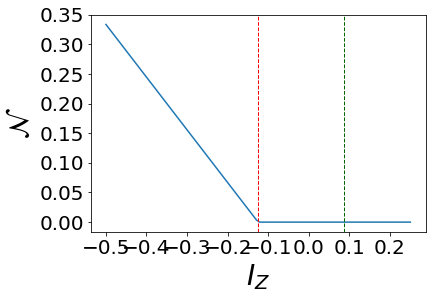

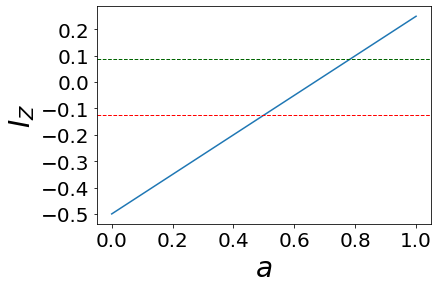

(0, -0.12500000000000003)

In [11]:
d = 3
cor = pccz
xlab = '$I_Z$'
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'maroon', 'magenta', 'darkgreen', 'black', 'brown', 'purple']
i_col = 0
c_list = []
n_list = []
for a in np.linspace(0,1,100):
    # c_list.append(1*Px(a,d)+1*Pz(a,d))
    # c_list.append(1*Ix(a,d)+1*Iz(a,d))
    c_list.append(1*cor(a,d))
    n_list.append(neg(a,d))
plt.plot(c_list, n_list)
# plt.plot(c_list, np.arange(0,1.01,0.1))	
#plt.ylim([0,1])
plt.xlabel(xlab, size=28)
plt.ylabel('$\mathcal{N}$', size=28)
plt.xticks(size=20)
plt.yticks(size=20)
# plt.legend(bbox_to_anchor=(1,1))
# plt.margins(0.03,0.03)
plt.axvline(x=cor(1/2, 3), ls='dashed', color='red', lw=1)
plt.axvline(x=0.087, ls='dashed', color='darkgreen', lw=1)
# plt.text(s='Separable or entangled', y=0.05, x=0.035, size=18, rotation=90)
# plt.text(s='Separable', y=0.05, x=-0.02, size=18, rotation=90)
# plt.text(s='Entangled', y=0.05, x=0.2, size=18, rotation=90)
# plt.savefig('n_vs_iz_werner.pdf', bbox_inches='tight')
plt.show()
x = np.linspace(0,1,100)
ya = [cor(x[i], d) for i in range(len(x))]
plt.plot(x,ya)
plt.ylabel(xlab, size=28)
plt.xlabel('$a$', size=28)
plt.xticks(size=20)
plt.yticks(size=20)
plt.axhline(y=0.087, ls='dashed', color='darkgreen', lw=1)
plt.axhline(y=cor(1/2, 3), ls='dashed', color='red', lw=1)
# plt.text(s='Separable or entangled', x=0.0, y=0.035, size=18)
# plt.text(s='Separable', x=-0.0, y=-0.02, size=18)
# plt.text(s='Entangled', x=0.0, y=0.2, size=18)
# plt.savefig('iz_vs_a_werner.pdf', bbox_inches='tight')
plt.show()
neg(1/2,3), cor(1/2,3)

# Noisy-Bells

In [117]:
import numpy as np, matplotlib.pyplot as plt

def delta(i,j):
	if i==j:
		return 1
	return 0
	
def pz(i,j,a,b,c,d):
	res = a/d * delta(i,j)
	res += (1-a)*((b/d**2) + (1-b)*((c/d)*delta(i,j) + (1-c)*(1-delta(i,j))/(d*(d-1))))
	return res
	
def px(i,j,a,b,c,d):
	res = a/d * delta(i,j) + (1-a)/d**2
	return res
	
def pxi(i,a,b,c,d):
	return sum([px(i,j,a,b,c,d) for j in range(d)])
	
def pxj(j,a,b,c,d):
	return sum([px(i,j,a,b,c,d) for i in range(d)])
	
def pzi(i,a,b,c,d):
	return sum([pz(i,j,a,b,c,d) for j in range(d)])
	
def pzj(j,a,b,c,d):
	return sum([pz(i,j,a,b,c,d) for i in range(d)])
	
def Px(a,b,c,d):
	res = sum([px(i,i,a,b,c,d) for i in range(d)])
	return res
	
def Pz(a,b,c,d):
	res = sum([pz(i,i,a,b,c,d) for i in range(d)])
	return res
	
def Ix(a,b,c,d):
	res = sum([px(i,j,a,b,c,d) * np.log2(px(i,j,a,b,c,d) / pxi(i,a,b,c,d) / pxj(j,a,b,c,d)) if px(i,j,a,b,c,d)!=0 else 0 for j in range(d) for i in range(d)])
	
	res = res.flatten()
	res = sum(res)
	
	return res
	
def Iz(a,b,c,d):
	res = sum([pz(i,j,a,b,c,d) * np.log2(pz(i,j,a,b,c,d) / pzi(i,a,b,c,d) / pzj(j,a,b,c,d)) if pz(i,j,a,b,c,d)!=0 else 0 for j in range(d) for i in range(d)])
	
	res = res.flatten()
	res = sum(res)
	
	return res

def pccz(a,b,c,d):
    x = [np.exp(1j * 2*np.pi / d * i) for i in range(d)]
    x = [-1,0,1]
    zz = sum([pz(i,j,a,b,c,d) * x[i] * x[j] for j in range(d) for i in range(d)])
    zi = sum([pzi(i,a,b,c,d) * x[i] for i in range(d)])
    zj = sum([pzj(j,a,b,c,d) * x[j] for j in range(d)])
    zzi = sum([pzi(i,a,b,c,d) * x[i]**2 for i in range(d)])
    zzj = sum([pzj(j,a,b,c,d) * x[j]**2 for j in range(d)])

    res = zz - zi*zj
    res = res / np.sqrt(zzi - zi**2)
    res = res / np.sqrt(zzj - zj**2)

    return res

def pccx(a,b,c,d):
    x = [np.exp(1j * 2*np.pi / d * i) for i in range(d)]
    x = [-1,0,1]
    zz = sum([px(i,j,a,b,c,d) * x[i] * x[j] for j in range(d) for i in range(d)])
    zi = sum([pxi(i,a,b,c,d) * x[i] for i in range(d)])
    zj = sum([pxj(j,a,b,c,d) * x[j] for j in range(d)])
    zzi = sum([pxi(i,a,b,c,d) * x[i]**2 for i in range(d)])
    zzj = sum([pxj(j,a,b,c,d) * x[j]**2 for j in range(d)])

    res = zz - zi*zj
    res = res / np.sqrt(zzi - zi**2)
    res = res / np.sqrt(zzj - zj**2)

    return res
	
def neg(a,b,c,d):
	n = (1/(2*d)) * (-d + a*d**2 + b - a*b + d*(1-a)*(1-b)*c)
	return max([0,n])

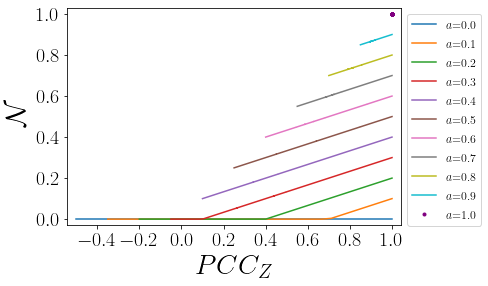

In [134]:
d = 3
cor = pccz
xlab = '$PCC_Z$'

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'maroon', 'magenta', 'darkgreen', 'black', 'brown', 'purple']
i_col = 0
for a in np.arange(0,1.01,0.1):
    i_list_a = []
    n_list_a = []
    # print(a)
    for b in np.arange(0,1.01, 0.1):
        # print(b)
        # i_list = [1*Ix(a,b,c,d)+0*Iz(a,b,c,d) for c in np.arange(0,1.01,0.01)]
        # i_list = [1*Ix(a,b,c,d)+0*Iz(a,b,c,d) for c in np.arange(0,1.01,0.01)]
        i_list = [1*cor(a,b,c,d) for c in np.arange(0,1.01,0.1)]
        n = [neg(a,b,c,d) for c in np.arange(0,1.01,0.1)]
        i_list_a = i_list_a + i_list
        n_list_a = n_list_a + n
    ord_list = list(zip(i_list_a, n_list_a))
    ord_list.sort()
    ord_list = np.array(list(map(list, ord_list)))
#     print(ord_list)
    i_list_a = ord_list[:,0]
    n_list_a = ord_list[:,1]
    if a == 1:
        plt.plot(i_list_a, n_list_a, 'o', mfc=colors[i_col], mec=colors[i_col], ms=3, label=f'$a$={np.round(a,1)}')
    else:
        plt.plot(i_list_a, n_list_a, '-', mfc=colors[i_col], mec=colors[i_col], ms=1, label=f'$a$={np.round(a,1)}')
    i_col += 1
	
#plt.ylim([0,1])
plt.xlabel(xlab, size=28)
plt.ylabel('$\mathcal{N}$', size=28)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(bbox_to_anchor=(1,1), fontsize=12)
plt.margins(0.03,0.03)
plt.savefig('n_vs_pccz_noisy_bells.pdf', bbox_inches='tight')
plt.show()

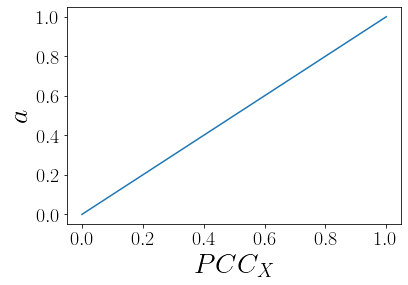

In [148]:
a = np.linspace(0,1,100)
ya = [pccx(a[i],1,1,3) for i in range(len(a))]
plt.plot(ya, a)
plt.xlabel('$PCC_X$', size=28)
plt.ylabel('$a$', size=28)
plt.xticks(size=20)
plt.yticks(size=20)
# plt.ylim([])
plt.savefig('a_vs_pccx_noisy_bells.pdf', bbox_inches='tight')
plt.show()

In [6]:
def negpcc(P):
    return max(0, (1/3)*(1 - (8*P + 16)/6))

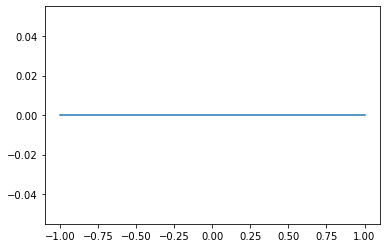

In [8]:
x = np.linspace(-1,1,100)
y = [negpcc(x[i]) for i in range(len(x))]
plt.plot(x,y)